In [5]:
import pandas as pd
import numpy as np
import time
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

from package.utils import KPIPoint
from package.utils import KPISet


# 可视化
def visualize(ts1, ts2):
    plt.figure(figsize=(80, 10))
    # 真实值
    plt.subplot(211)
    plt.xlabel('timestamp')
    plt.ylabel('KPI')
    plt.title('time series1')
    plt.plot(ts1, 'g', label='KPI')
#     plt.axis([0, 4032, 0, 160000])
    plt.legend(loc='best')
    # 第二阶段总叶子节点数量
    plt.subplot(212)
    plt.xlabel('timestamp')
    plt.ylabel('KPI')
    plt.title('number series2')
    plt.plot(ts2, 'g', label='KPI')
#     plt.axis([0, 4032, 0, 160000])
    plt.legend(loc='best')
    plt.show()

#### 验证集

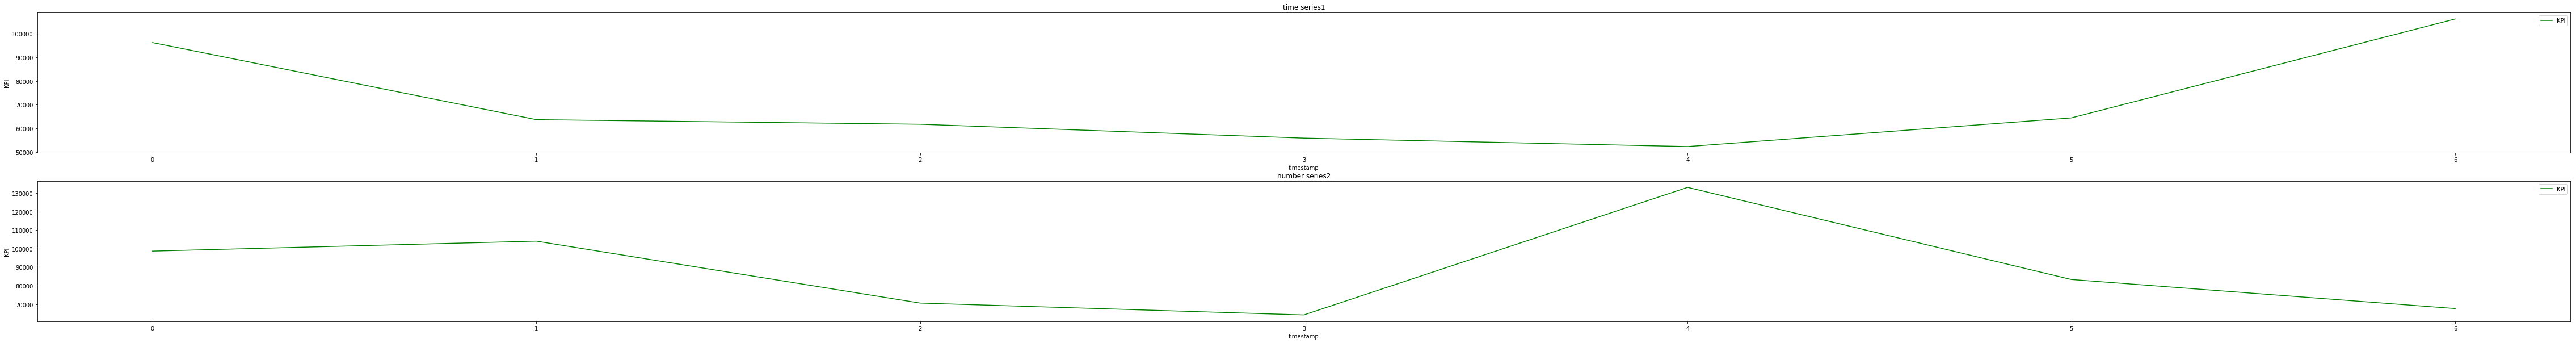

100%|██████████| 2016/2016 [02:29<00:00, 15.70it/s]


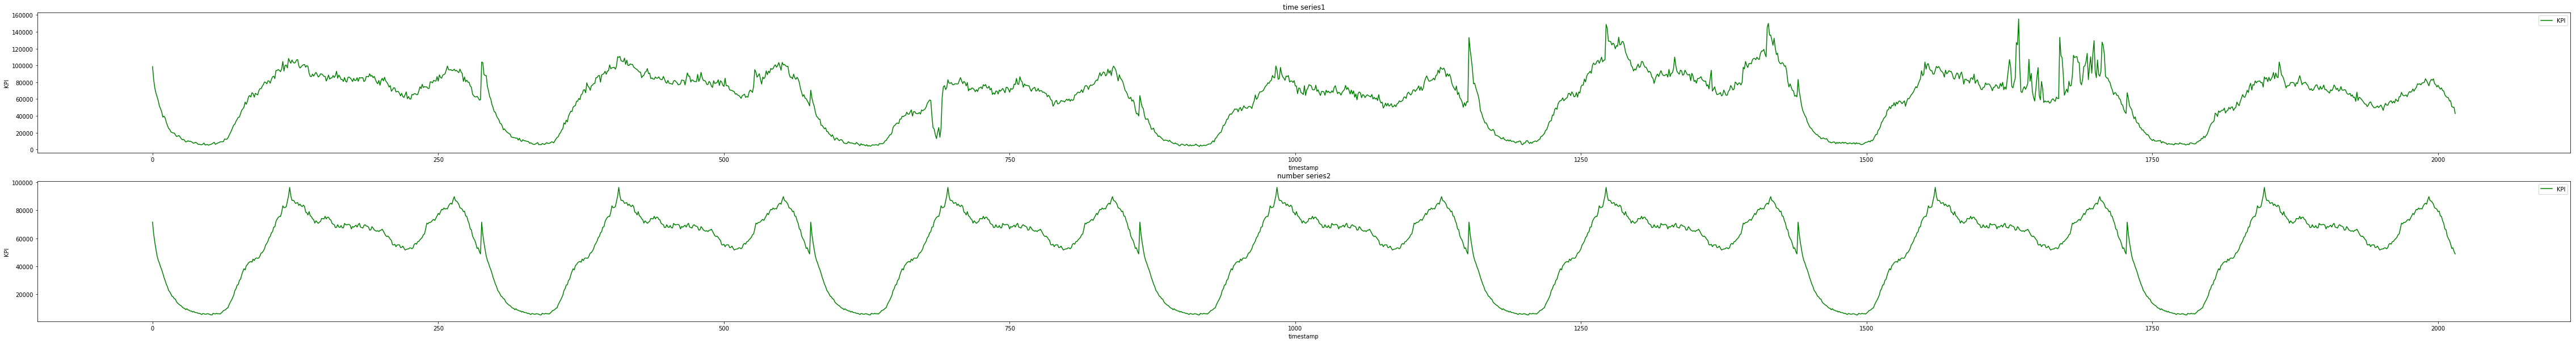

In [2]:
# 加载第一周数据
kSet_train = KPISet({}, {})
kSet_train.load('../result/metadata/KPISetTrain')
# kSet_train.test()
ts_train = kSet_train.get_ts_ele(ele=('i38', 'e10', 'c1', 'p10', 'l3'), t1=1535731200, t2=1536335700, delta=300 * 288)

# 加载第二周数据
kSet_valid = KPISet({}, {})
kSet_valid.load('../result/metadata/KPISetValid')
# kSet_valid.test()
ts_valid = kSet_valid.get_ts_ele(ele=('i38', 'e10', 'c1', 'p10', 'l3'), t1=1536336000, t2=1536940500, delta=300 * 288)

# 可视化
visualize(ts_train['true'], ts_valid['true'])

100%|██████████| 2016/2016 [02:24<00:00, 13.95it/s]


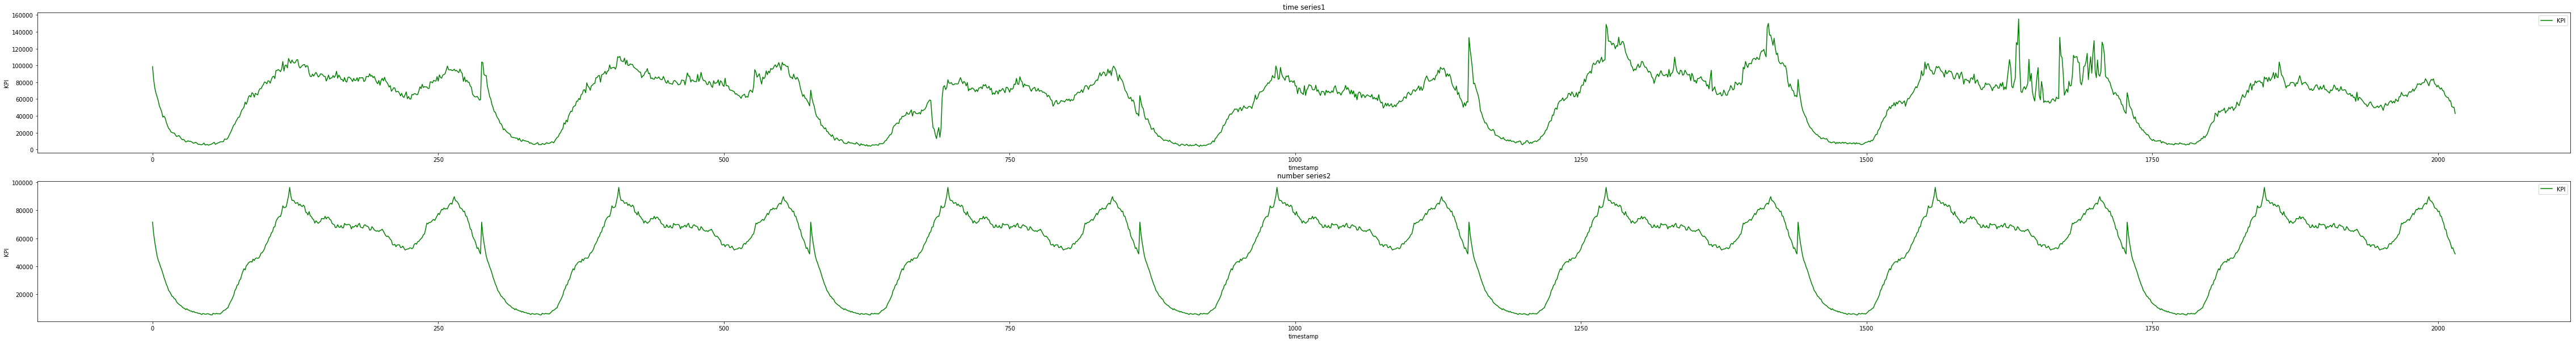

In [7]:
# 使用第一周数据预测第二周数据
I = 300
T = I * 288
train_timestamp_start = 1535731200
train_timestamp_end = 1536335700
for timestamp in tqdm(kSet_valid._KPIPoints):
    tw = math.floor((timestamp - 16 * 3600) % (3600 * 24) / I)
    # print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(timestamp)), tw)
    for leaf in kSet_valid._KPIPoints[timestamp]._leaf:
        ts_true = kSet_train.get_ts_leaf(leaf=leaf, 
                                         t1=train_timestamp_start + tw * I,
                                         t2=train_timestamp_end, 
                                         delta=T)['true']
        predict = np.mean(ts_true)
        kSet_valid._KPIPoints[timestamp]._leaf[leaf][1] = predict

# 查看预测效果
ts_valid = kSet_valid.get_ts_ele(ele=('i38', 'e10', 'c1', 'p10', 'l3'), t1=1536336000, t2=1536940500, delta=300)
visualize(ts_valid['true'], ts_valid['pred'])

#### 保存数据
kSet_valid.save('../result/metadata/KPISetValidPredict')

#### 测试集

In [ ]:
# 加载训练集
kSet = KPISet({}, {})
kSet.load('../result/metadata/KPISet')
# kSet.test()
ts = kSet.get_ts_ele(ele=('i38', 'e10', 'c1', 'p10', 'l3'), t1=1535731200, t2=1536940500, delta=300 * 288)

# 加载测试集
kSet_test = KPISet({}, {})
kSet_test.load('../result/metadata/KPISetTest')
# kSet_test.test()
ts_test = kSet_test.get_ts_ele(ele=('i38', 'e10', 'c1', 'p10', 'l3'), t1=1536940800, t2=1538150100, delta=300 * 288)

# 可视化
visualize(ts_test['true'], ts['true'])

# 使用前两周数据预测本周数据
I = 300
T = I * 288
train_timestamp_start = 1535731200
train_timestamp_end = 1536940500
for timestamp in tqdm(kSet_test._KPIPoints):
    tw = math.floor((timestamp - 16 * 3600) % (3600 * 24) / I)
    # print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(timestamp)), tw)
    for leaf in kSet_test._KPIPoints[timestamp]._leaf:
        ts_true = kSet.get_ts_leaf(leaf=leaf, t1=train_timestamp_start + tw * I, t2=train_timestamp_end, delta=T)[
            'true']
        predict = np.mean(ts_true)
        kSet_test._KPIPoints[timestamp]._leaf[leaf][1] = predict

# 查看预测效果
ts_test = kSet_test.get_ts_ele(ele=('i38', 'e10', 'c1', 'p10', 'l3'), t1=1536940800, t2=1538150100, delta=300)
visualize(ts_test['true'], ts_test['pred'])

#### 保存数据
kSet_test.save('../result/metadata/KPISetTestPredict')